# **Ejecutando tu primera red neuronal.**

Este es un ejemplo con un dataset de "juego" con el que podemos probar lo aprendido, antes de empezar a revisar el codigo puedes:

1. Cambia el entorno de ejecucion de google colab (T4 GPU)
2. Ejecuta celda por celda.
3. Revisa cuidadosamente los comentarios y todas las dudas que tengas me las puedes preguntar c:


In [2]:
# Se importan algunas de las librerias que seran necesarias para el proyecto (aunque no son todas las que usaremos)

from sklearn.datasets import make_circles
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generar el dataset make_circles

# n_samples => Total de datos que tenemos
# factor => Cercania entre los puntos de las distintas clases
# noise => Ruido de los puntos
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

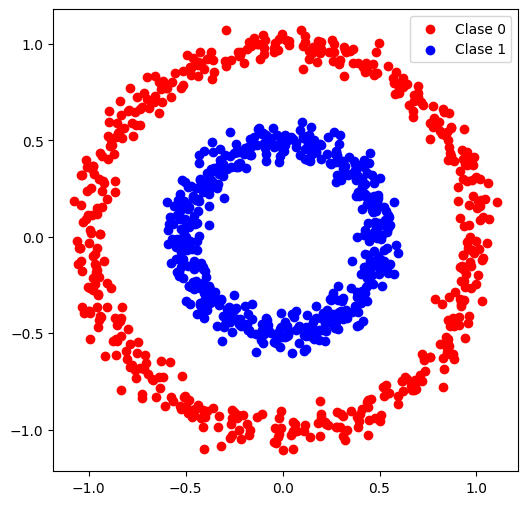

In [4]:
# Visualizar los datos de nuestro Dataset de ejemplo
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Clase 1')
plt.legend()
plt.show()

## Datos de entrenamiento y de test

Al separar los datos de nuestro dataset entre entrenamiento y test, logramos que se reduzca el riesgo de *Overfitting* y asi la red logra ser mas flexible y adaptable a datos nuevos

## Escalar los datos
Al escalar los datos logramos que la efectividad del modelo sea mayor debido a las caracteristicas matematicas que funcionan internamente en las redes neuronales.

In [5]:
# Importar las herramientas necesarias para división de datos y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (en este caso en particular no es necesario, pero es una de las opciones que tenemos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Definir el modelo de red neuronal usando Keras
model = tf.keras.models.Sequential()

# Agregar una capa densa de 32 neuronas con la función de activación ReLU
# Tiene un input_dim = 2 por la estructura de los datos que le estamos pasando (2D)
model.add(tf.keras.layers.Dense(16, input_dim=2, activation='relu'))

# Agregar una segunda capa densa de 32 neuronas con activación ReLU
model.add(tf.keras.layers.Dense(8, activation='relu'))

# Agregar la capa de salida con 1 neurona y función de activación sigmoide para la clasificación binaria
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=False)

In [8]:
# Evaluar el modelo en los datos de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0025 

Precisión en el conjunto de prueba: 1.00


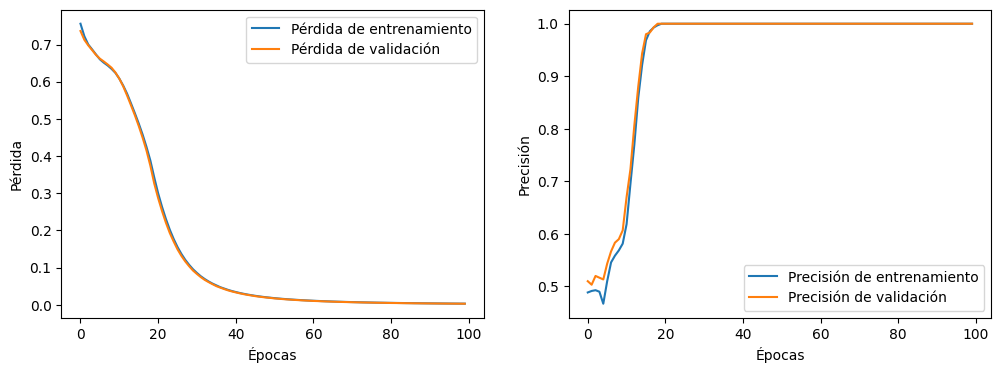

In [11]:
# Graficar la evolución de la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


<ipython-input-12-d0562d988b33>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, label='Prueba')


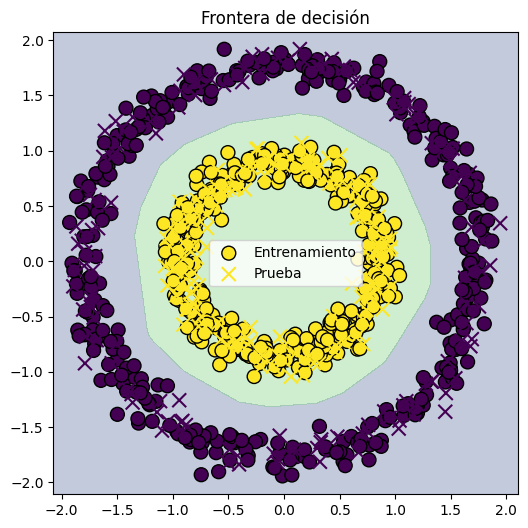

In [12]:
# Generar una malla de puntos que cubra el rango de los datos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predecir en la malla de puntos
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión usando contour
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='viridis')

# Graficar los puntos de entrenamiento y prueba
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, label='Prueba')

# Personalizar el gráfico
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.title("Frontera de decisión")
plt.show()

# **Reto 1.**

Ve a la inicializacion de los datos ( X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05) ) y pon los valores de:
1. factor = 0.75
2. noise = 0.1

Tu objetivo es alcanzar el valor mas alto en accuracy tanto en entrenamiento como en test y que tu modelo no sufra de los problemas que repasamos hoy.

Puedes:
1. Cambiar las capas del modelo, añadir mas o quitar, cambiar el numero de neuronas por capa y cambiar la funcion de activacion (busca mas opciones en documentacion o pide ayuda a chatGPT)
2. Cambiar el numero de epocas de entrenamiento, el optimizador e incluso la funcion de perdida (aunque este ultimo no es recomendable)
3. Puedes realizar tecnicas de aumento de datos **PERO NO PUEDES TOCAR EL n_samples DEL DATASET ORIGINAL**

**La forma de medirlo sera realizando un promedio entre el accuracy de train y de test en la celda de abajo**

In [ ]:
_, challenge_test_acc = model.evaluate(X_test, y_test)
_, challenge_train_acc = model.evaluate(X_train, y_train)
mean_acc = (challenge_test_acc + challenge_train_acc) / 2
print(f'\nPrecisión en el conjunto de prueba: {challenge_test_acc:.2f}')
print(f'\nPrecisión en el conjunto de entrenamiento: {challenge_train_acc:.2f}')
print(f'\nPrecisión promedio: {mean_acc:.2f}')